# DIAMONDS IN-DEPTH ANALYSIS

## Topics

* Exploring Dataset
* Correlation b/w Features
* Visualizations
* Feature Engineering
* Feature Encoding
* Feature Scaling
* Modelling Algorithms
* Comparing R2 Scores

## Importing Libraries

In [19]:
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math

# Modelling Regression Algorithms :
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

# Modelling Helpers :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

#preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

#evaluation metrics - Regression :
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [6]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Explore Dataset & Examine what Features affect the Price of Diamonds

In [1]:
df = pd.read_csv('diamonds.csv')
diamonds = df.copy()

<IPython.core.display.Javascript object>

In [2]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## Features

* Carat : Carat weight of the Diamond.

* Cut : Describe cut quality of the diamond.

* Quality in increasing order Fair, Good, Very Good, Premium, Ideal .

* Color : Color of the Diamond.
    * With D being the best and J the worst.

* Clarity : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
    * (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3)

* Depth : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.

* Table : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.

* Price : the Price of the Diamond.

* X : Length of the Diamond in mm.

* Y : Width of the Diamond in mm.

* Z : Height of the Diamond in mm.

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Examine NaN Values

In [8]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
!pip install missingno

In [10]:
import missingno as msno

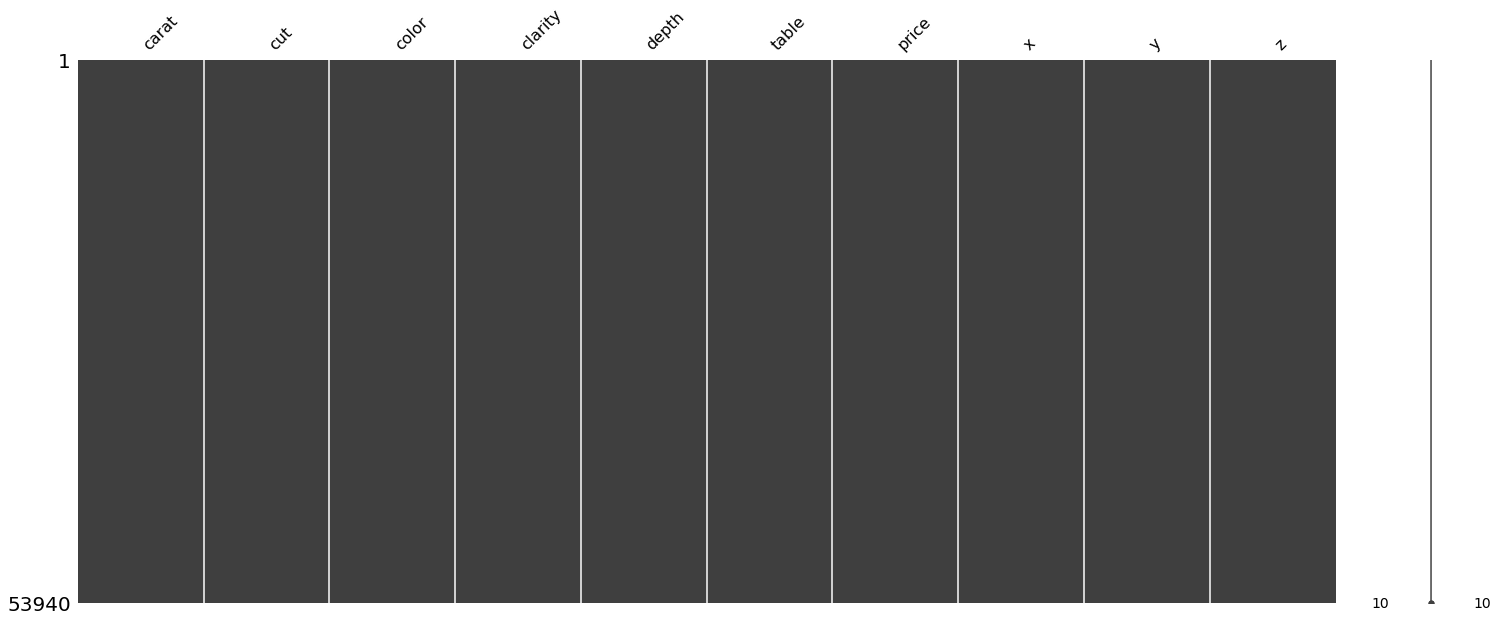

In [11]:
msno.matrix(df)

**No missing Values!! Great!**

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Wait**

* Do you see the Min. Values of X, Y and Z. It can't be possible..!!
* It doesn't make any sense to have either of Length or Width or Height to be zero.

In [13]:
df.loc[(df['x']==0)|(df['y']==0)|(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [14]:
len(df.loc[(df['x']==0)|(df['y']==0)|(df['z']==0)])

20

### Dropping Rows with Dimensions 'Zero'.

In [15]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [16]:
df.loc[(df['x']==0)|(df['y']==0)|(df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


### Scaling of all Features

<IPython.core.display.Javascript object>

C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Anurag\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


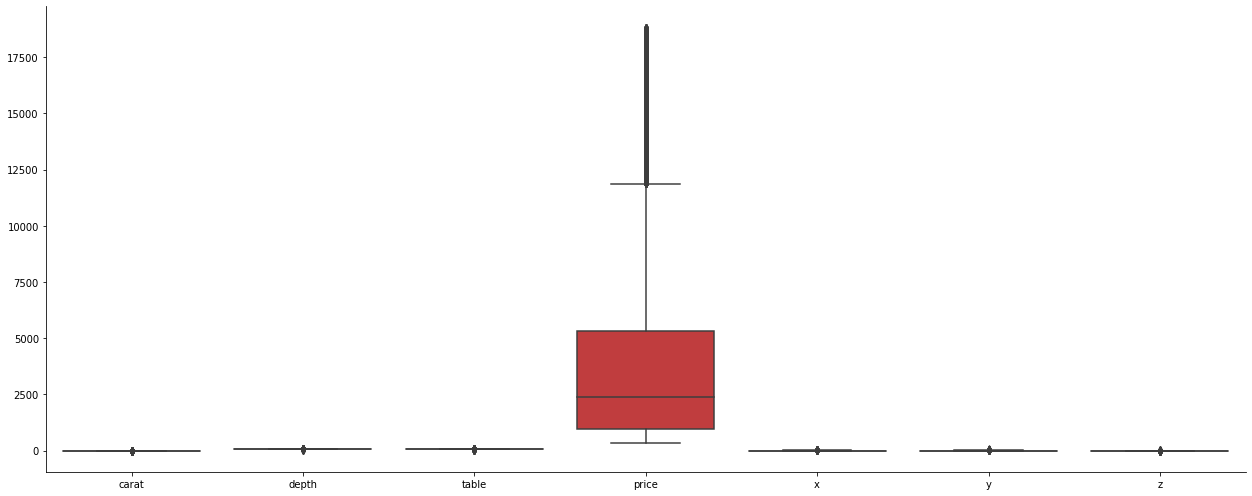

In [17]:
sns.factorplot(data=df, kind='box', size=7, aspect=2.5)

# Correlation Between Features

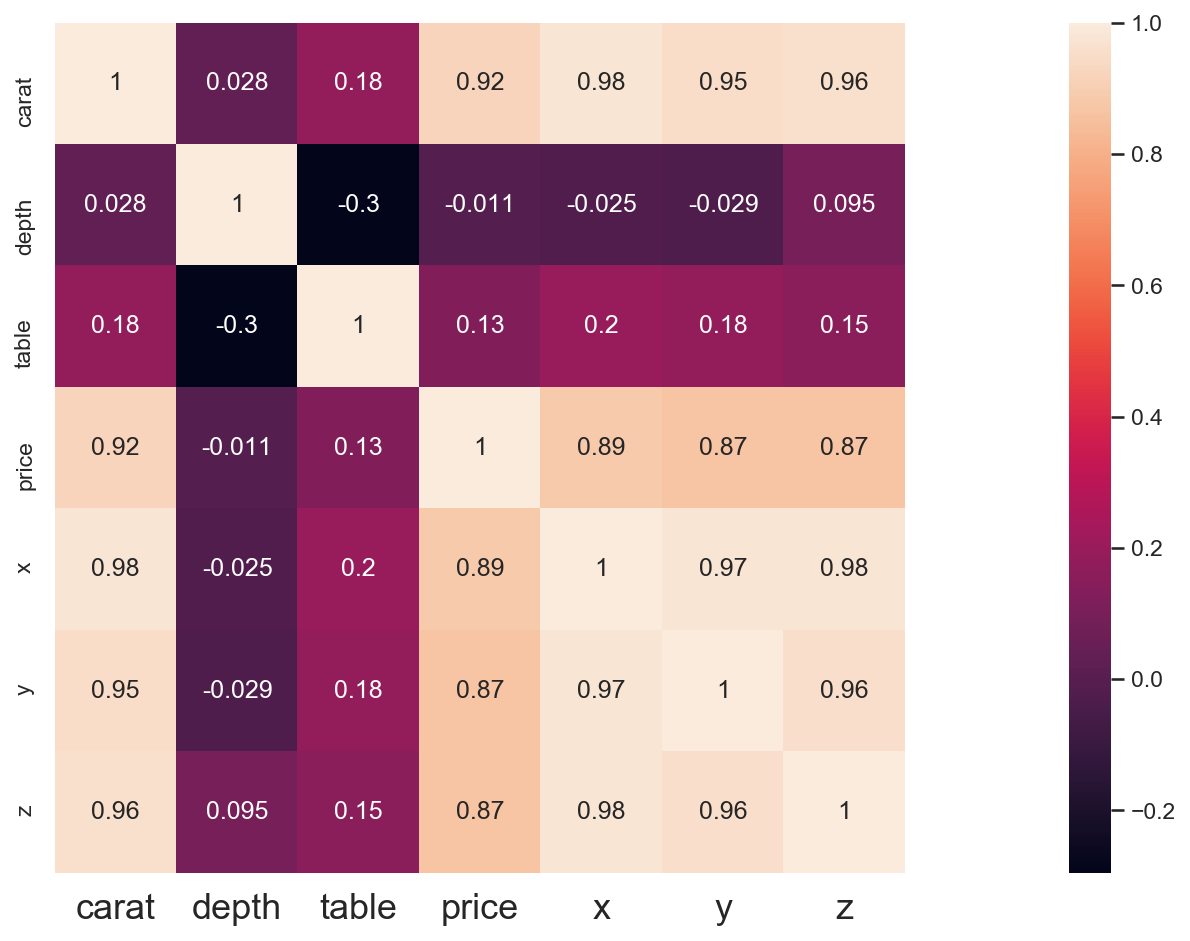

In [20]:
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

# Visualization Of All Features

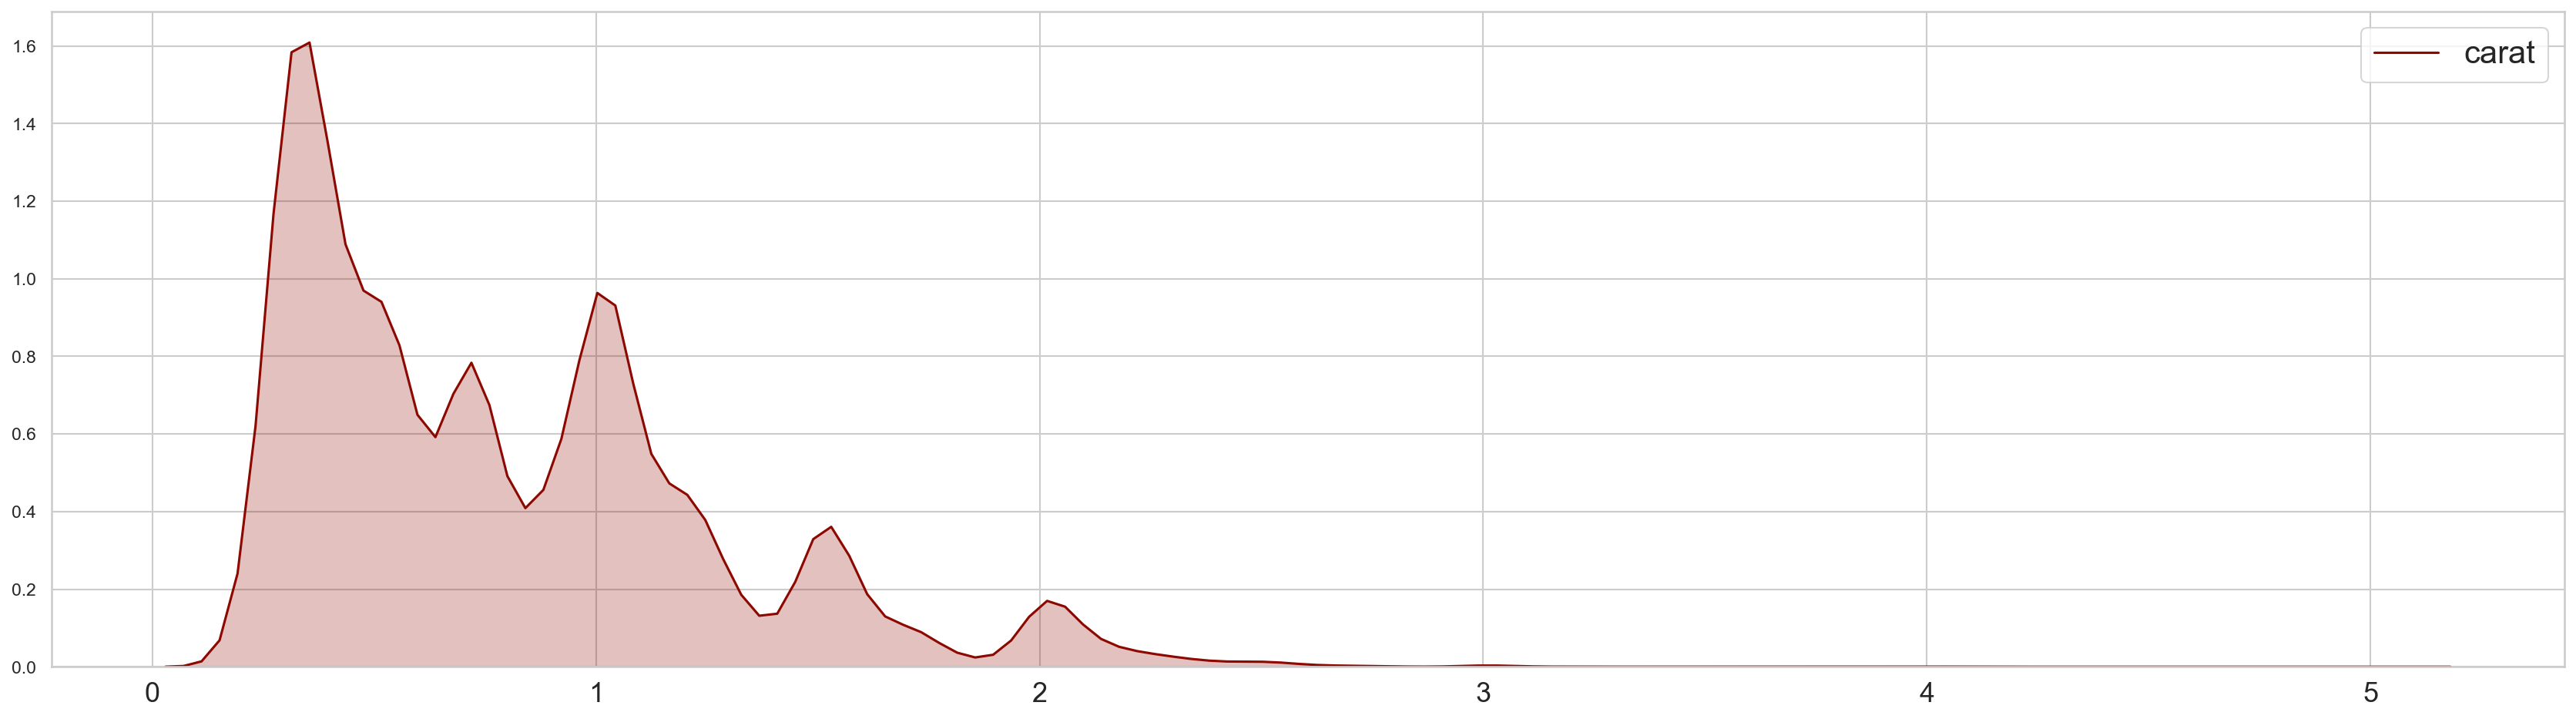

In [21]:
sns.kdeplot(df['carat'], shade=True, color='r')

### Carat vs Price

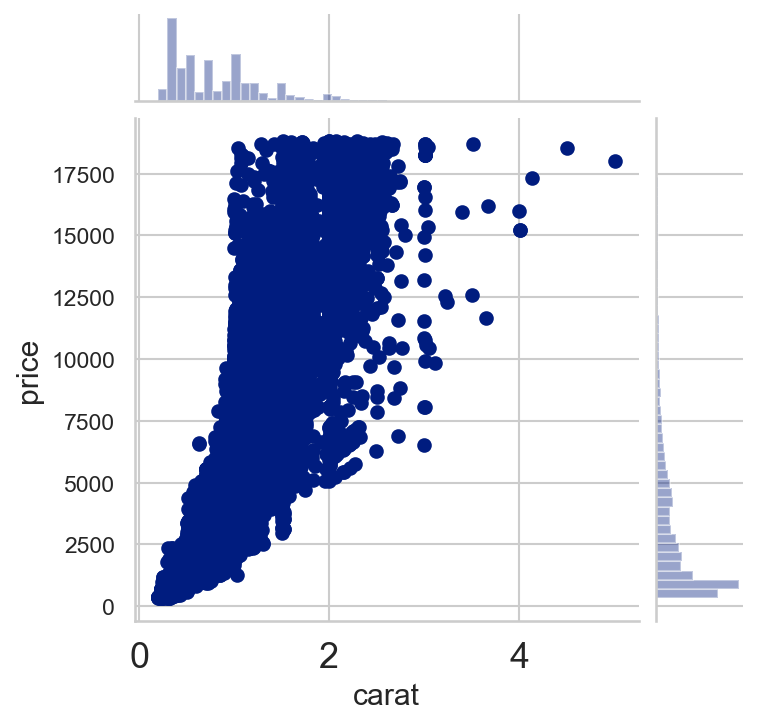

In [23]:
sns.jointplot(x='carat',y='price', data=df, height=5)

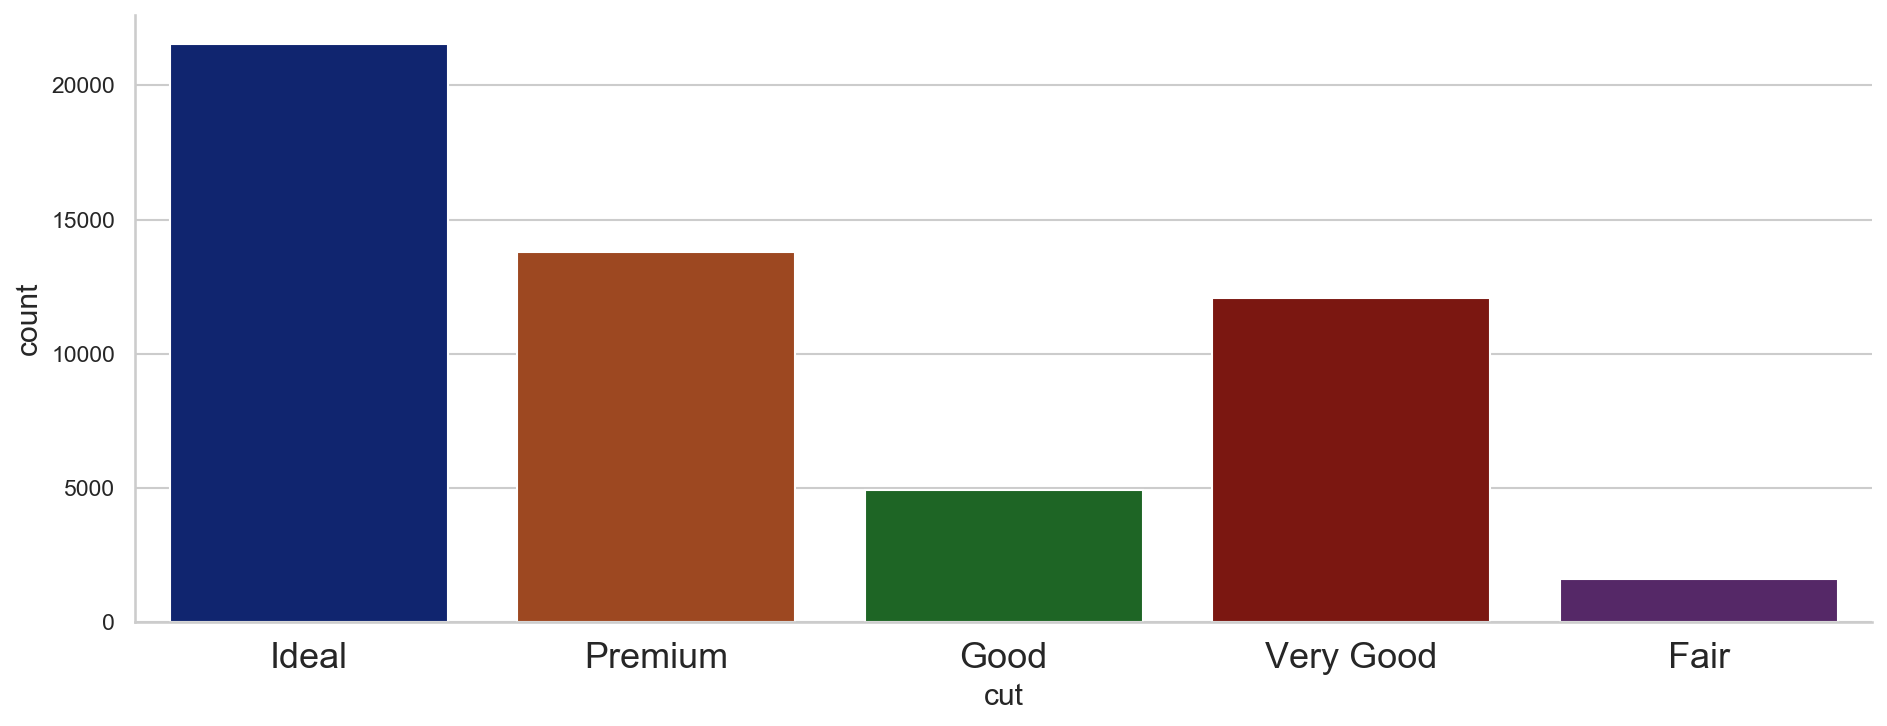

In [27]:
sns.catplot(x='cut', data=df, kind='count', aspect=2.5)

### Cut vs Price

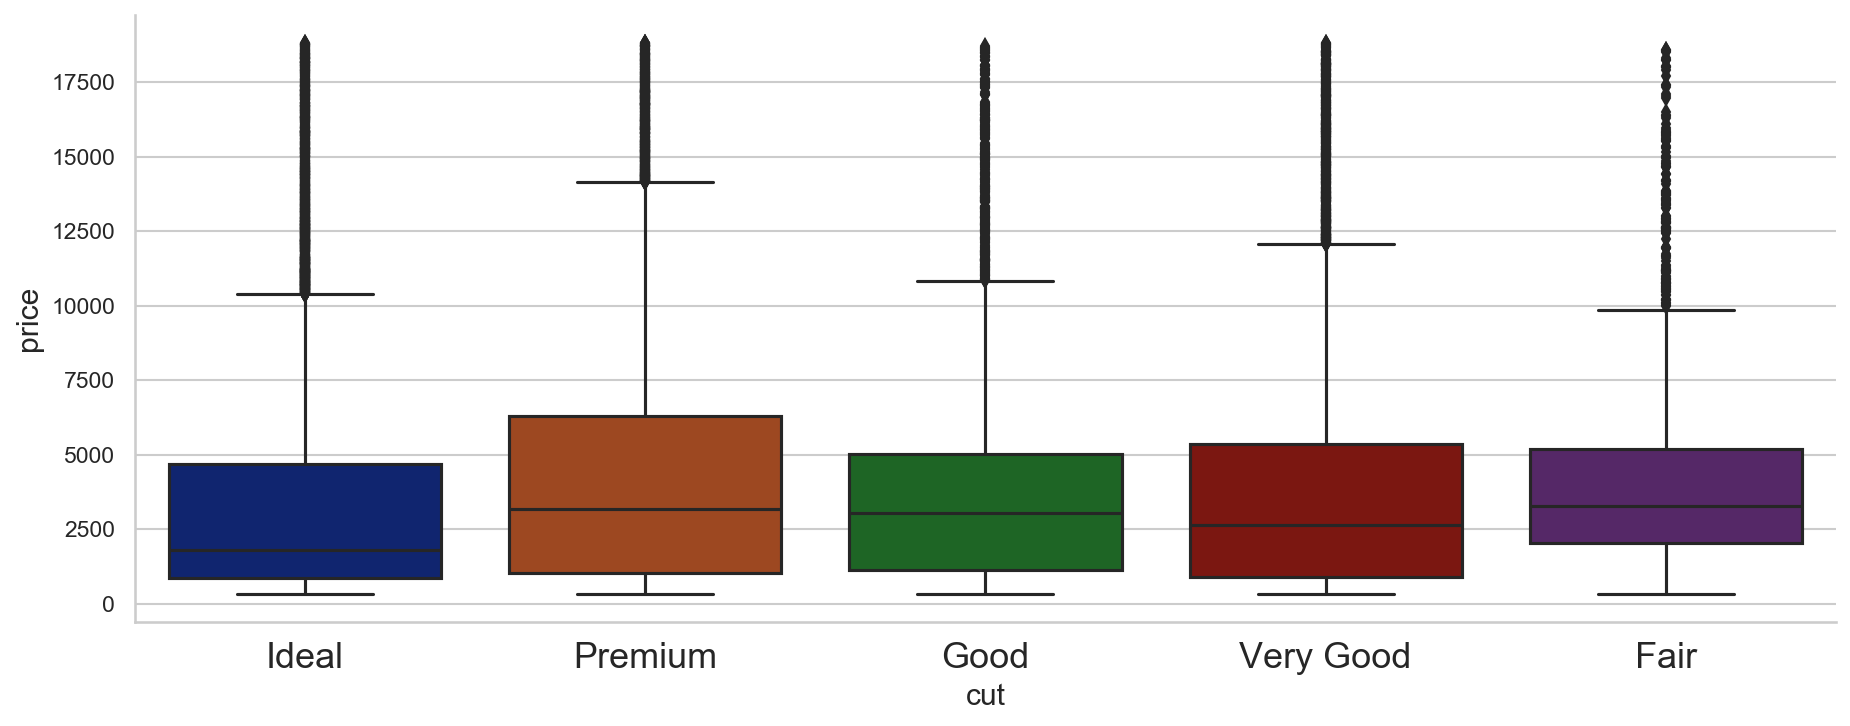

In [28]:
sns.catplot(x='cut', y='price', data=df, kind='box', aspect=2.5)

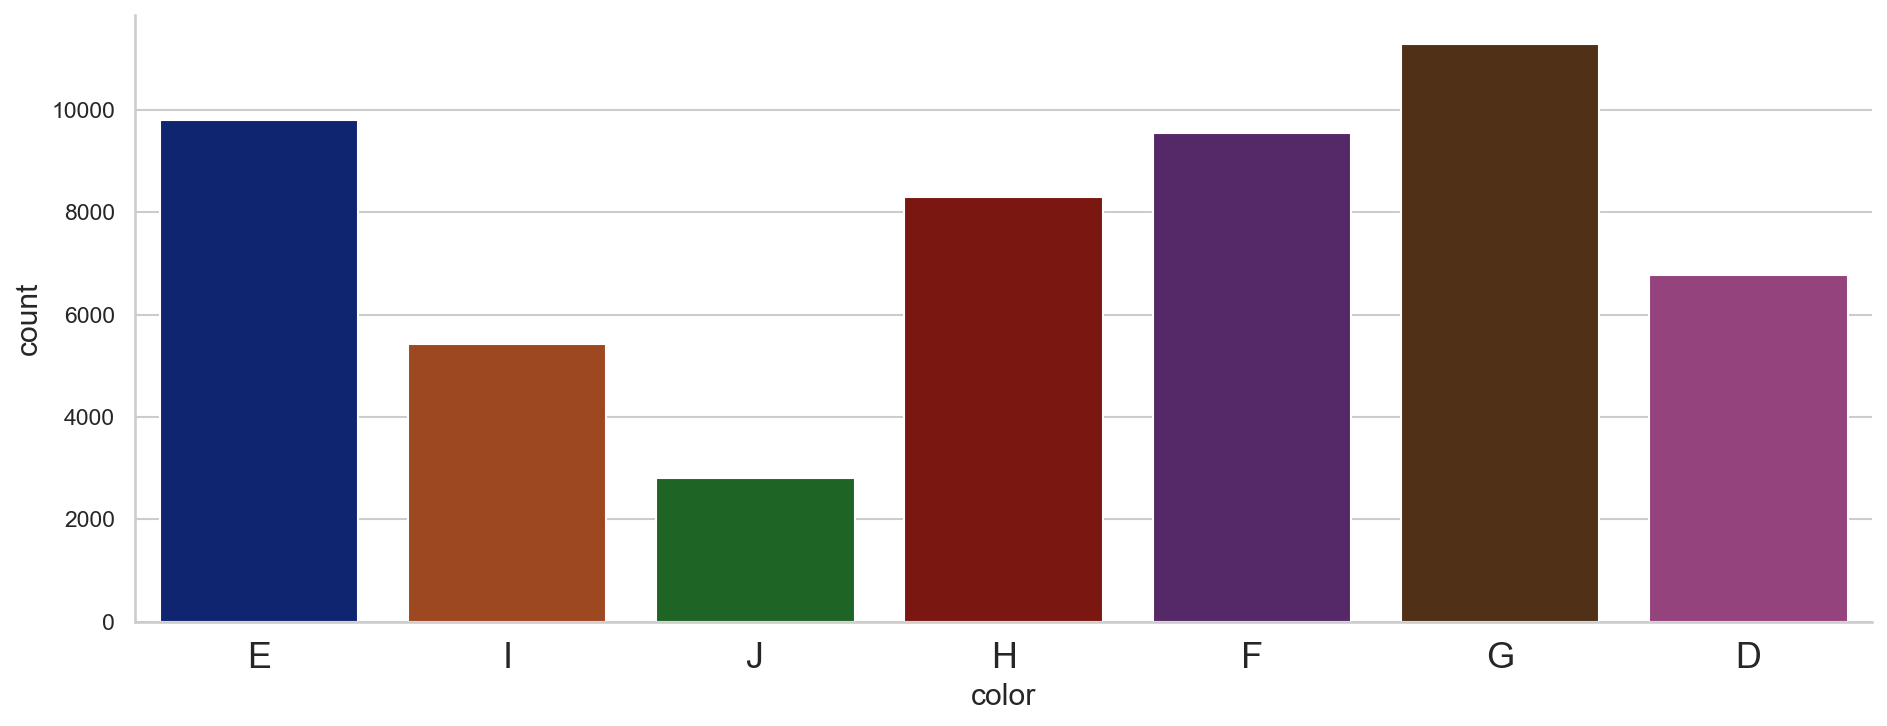

In [29]:
sns.catplot(x='color', data=df, kind='count', aspect=2.5)

### Color vs Price

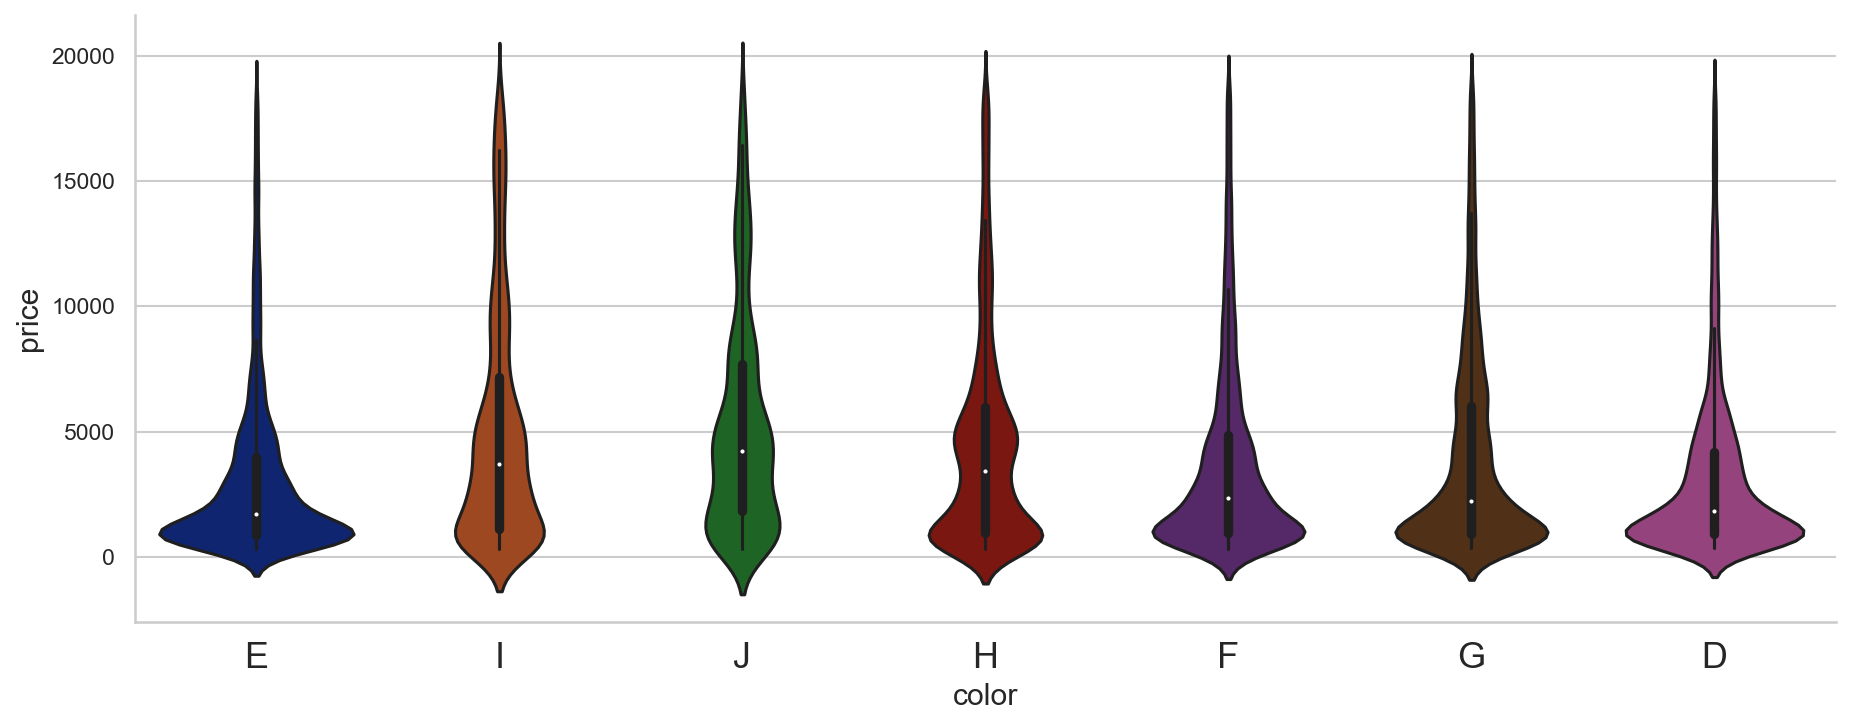

In [30]:
sns.catplot(x='color', y='price', data=df, kind='violin', aspect=2.5)

### Clarity

In [32]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

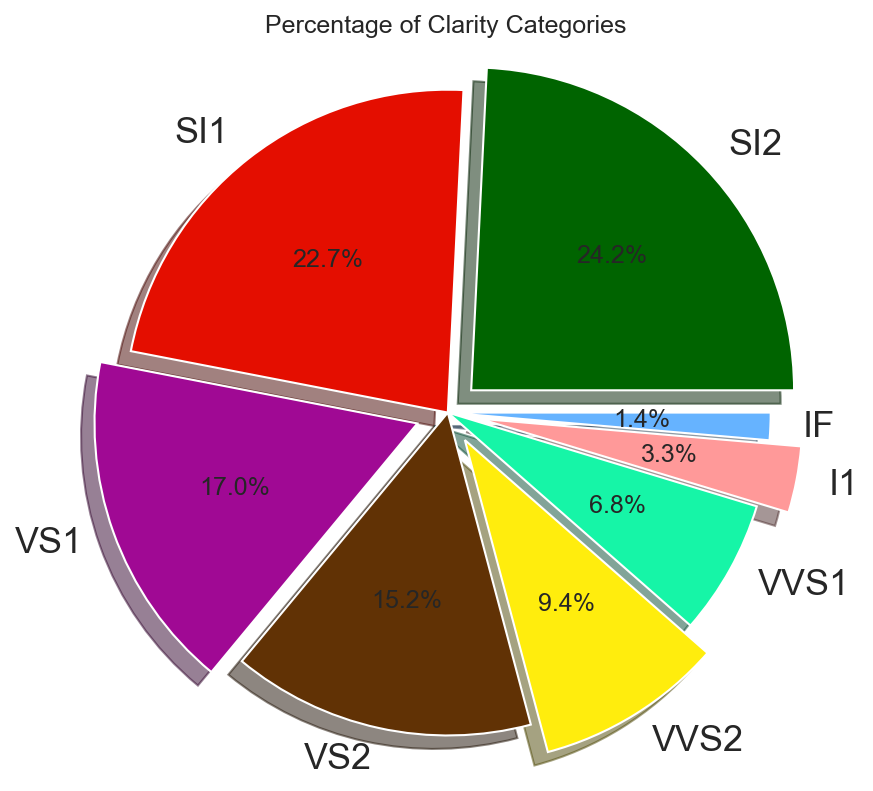

In [31]:
labels = df.clarity.unique().tolist()
sizes = df.clarity.value_counts().tolist()
colors = ['#006400', '#E40E00', '#A00994', '#613205', '#FFED0D', '#16F5A7','#ff9999','#66b3ff']
explode = (0.1, 0.0, 0.1, 0, 0.1, 0, 0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title("Percentage of Clarity Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

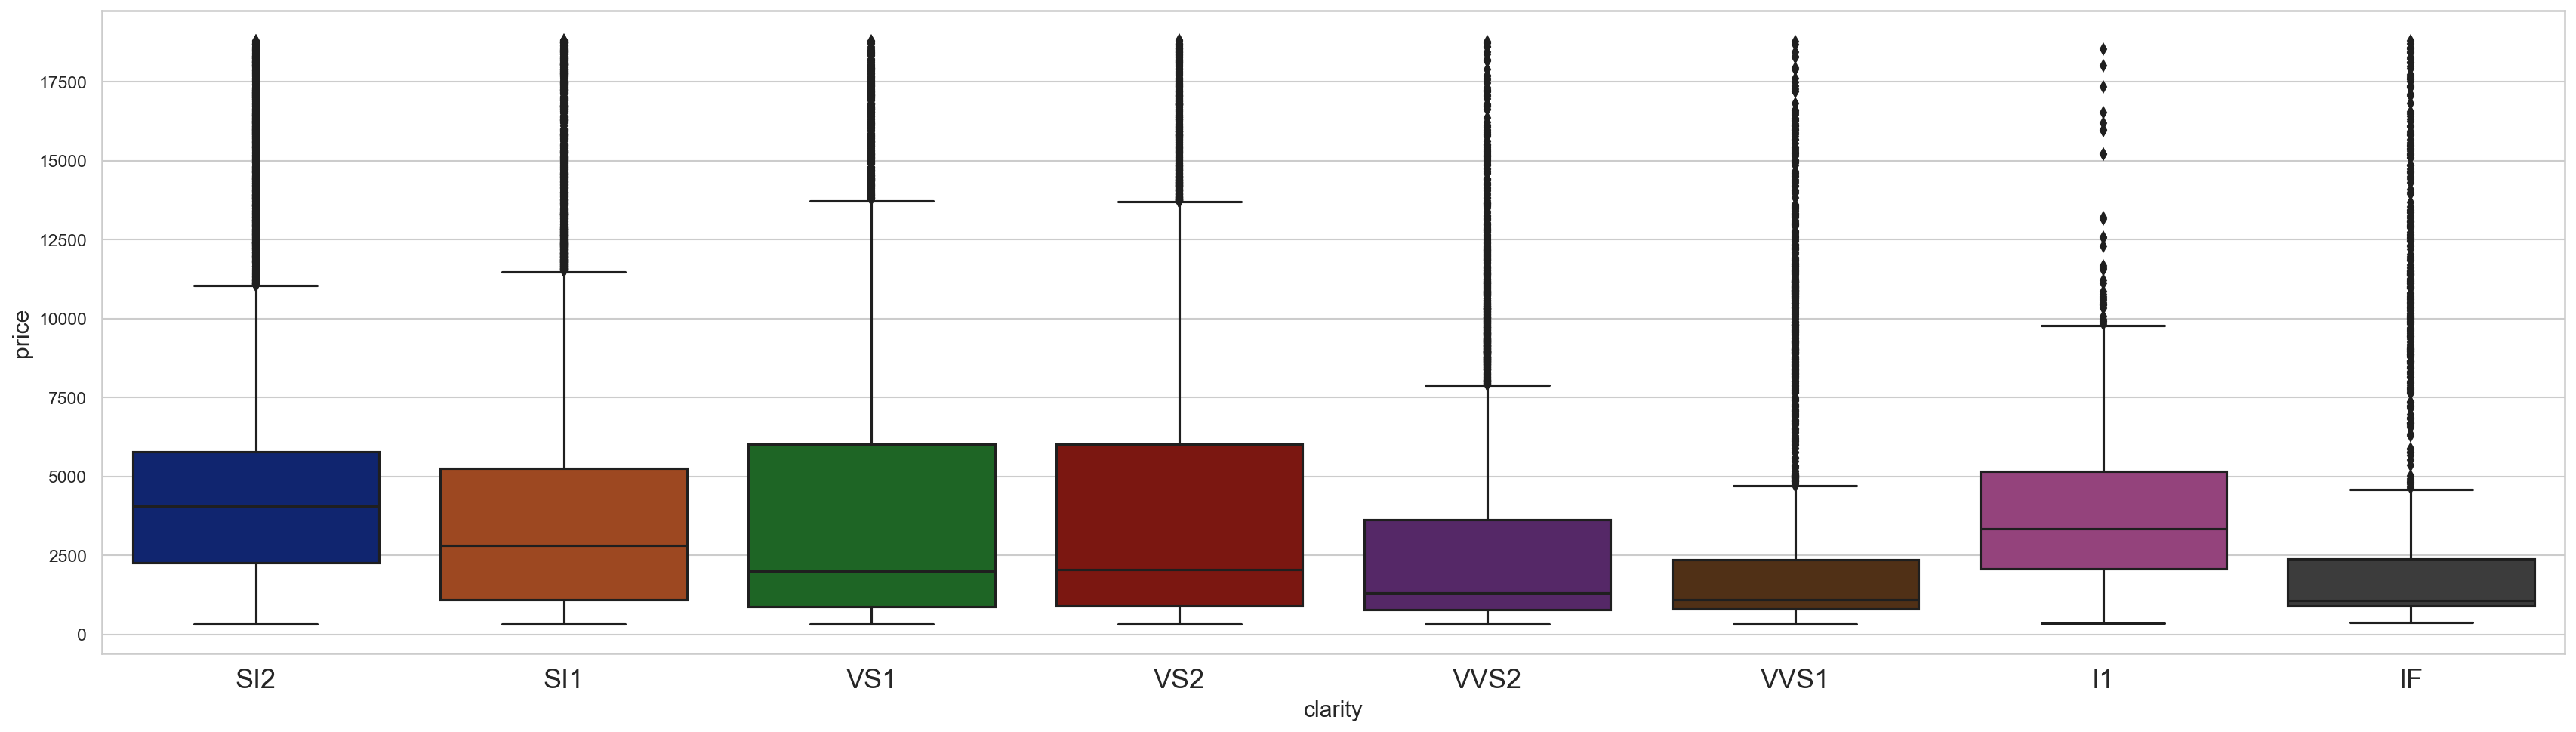

In [33]:
sns.boxplot(x='clarity', y='price', data=df)

### Depth

(array([3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 1.1000e+01, 4.3000e+01, 2.1900e+02,
        1.4240e+03, 5.0730e+03, 1.8242e+04, 2.2649e+04, 5.0330e+03,
        8.5100e+02, 2.3400e+02, 8.7000e+01, 2.7000e+01, 1.1000e+01,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([43.  , 44.44, 45.88, 47.32, 48.76, 50.2 , 51.64, 53.08, 54.52,
        55.96, 57.4 , 58.84, 60.28, 61.72, 63.16, 64.6 , 66.04, 67.48,
        68.92, 70.36, 71.8 , 73.24, 74.68, 76.12, 77.56, 79.  ]),
 <a list of 25 Patch objects>)

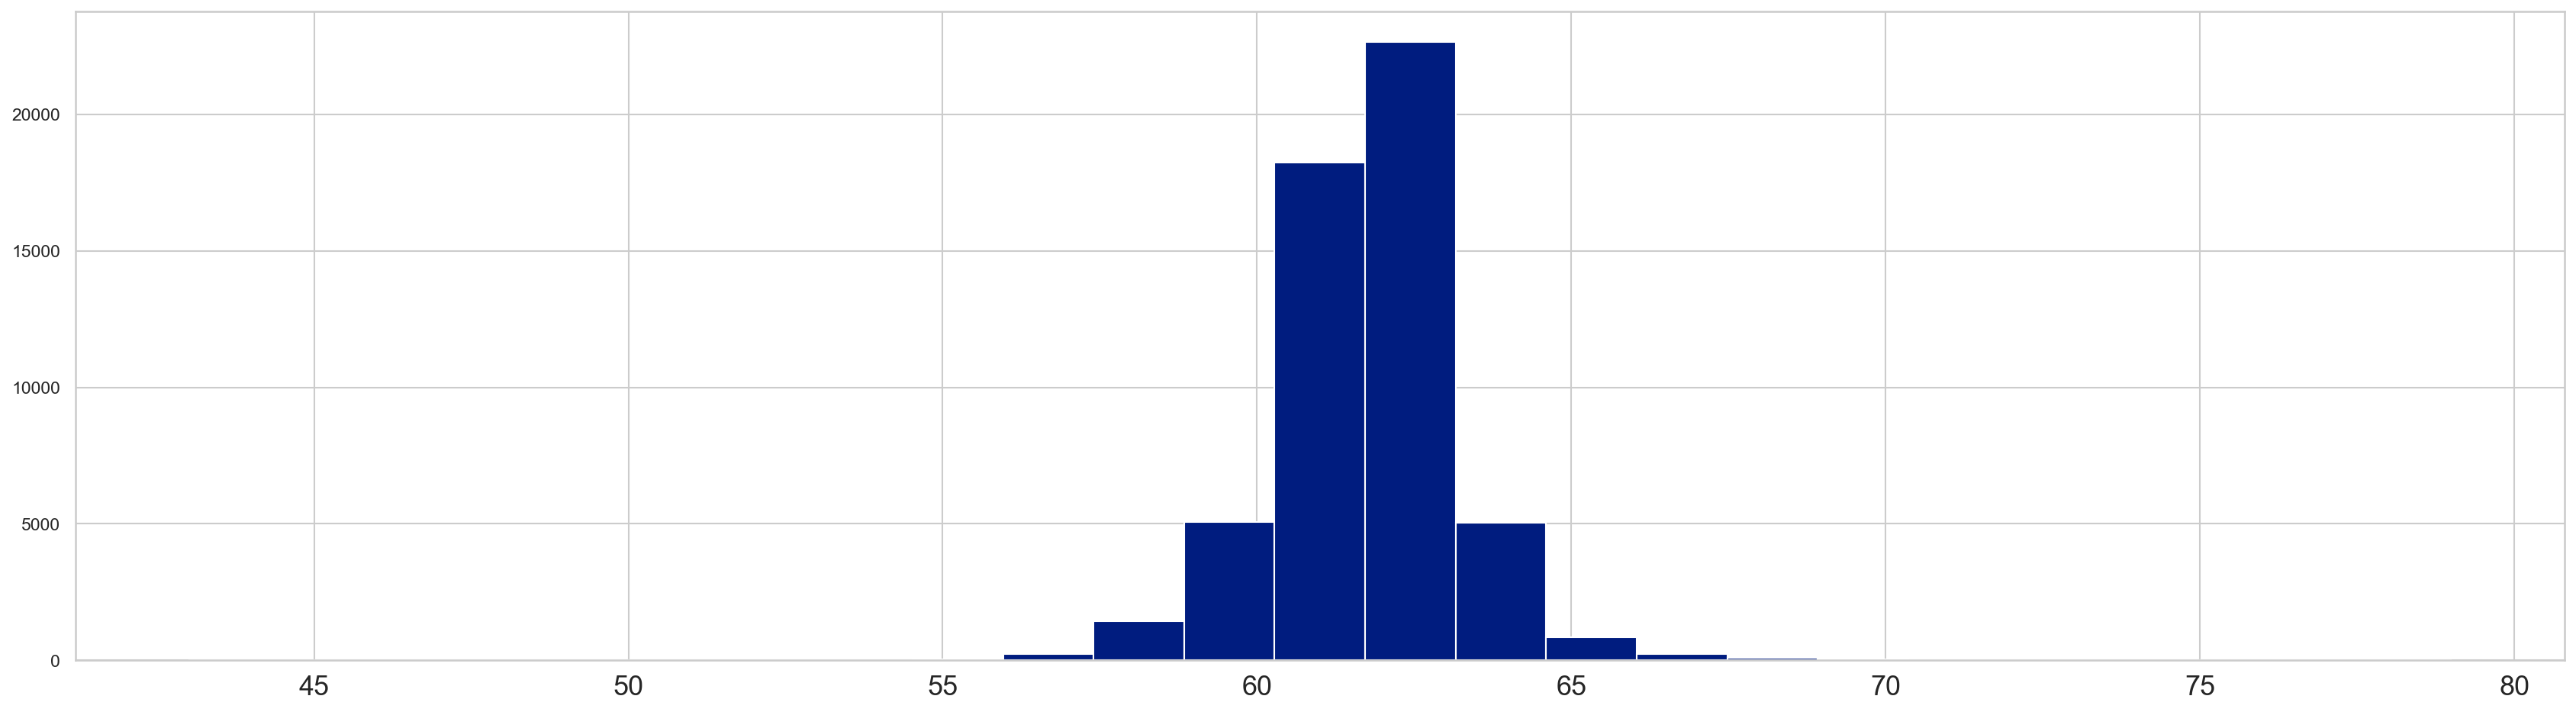

In [34]:
plt.hist(x='depth', data=df, bins=25)

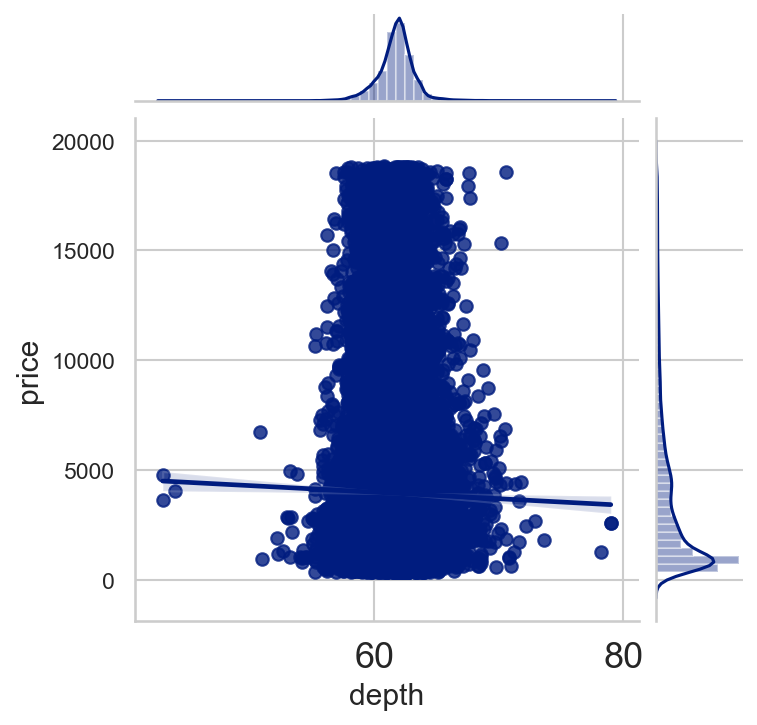

In [36]:
sns.jointplot(x='depth', y='price' , data=df , kind='regplot', height=5)

### Table

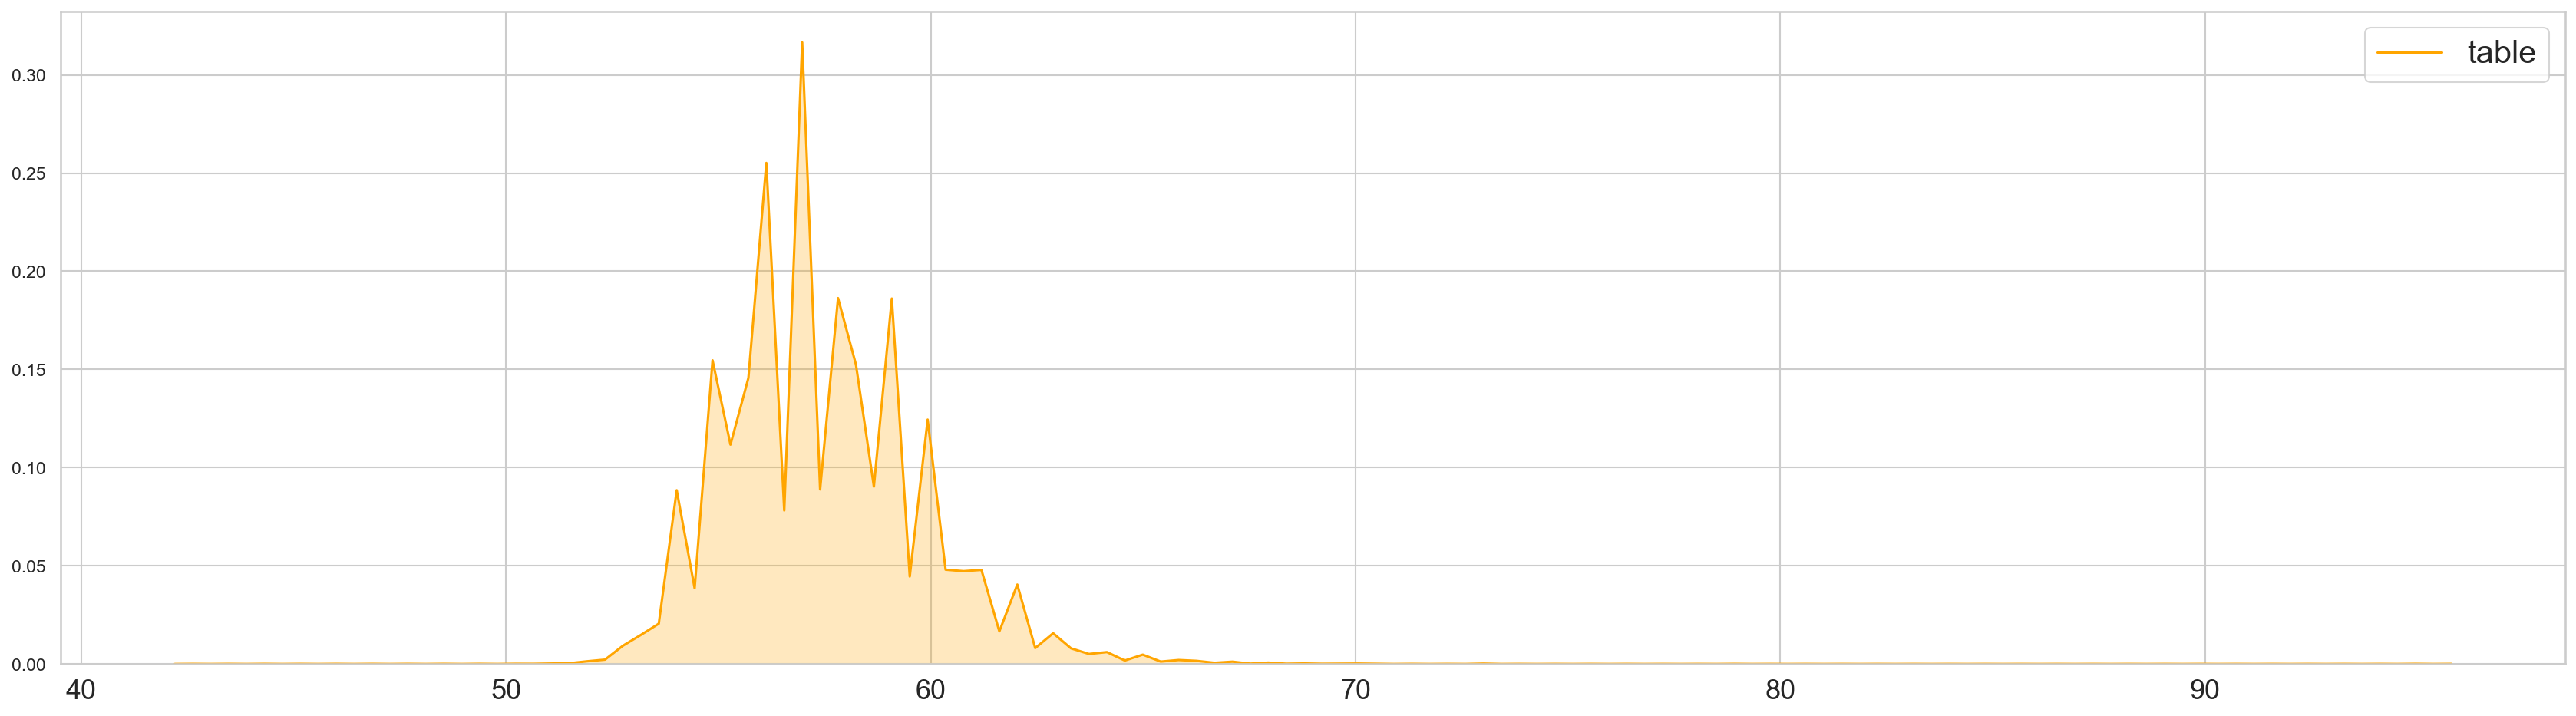

In [38]:
sns.kdeplot(df['table'], shade=True, color='orange')

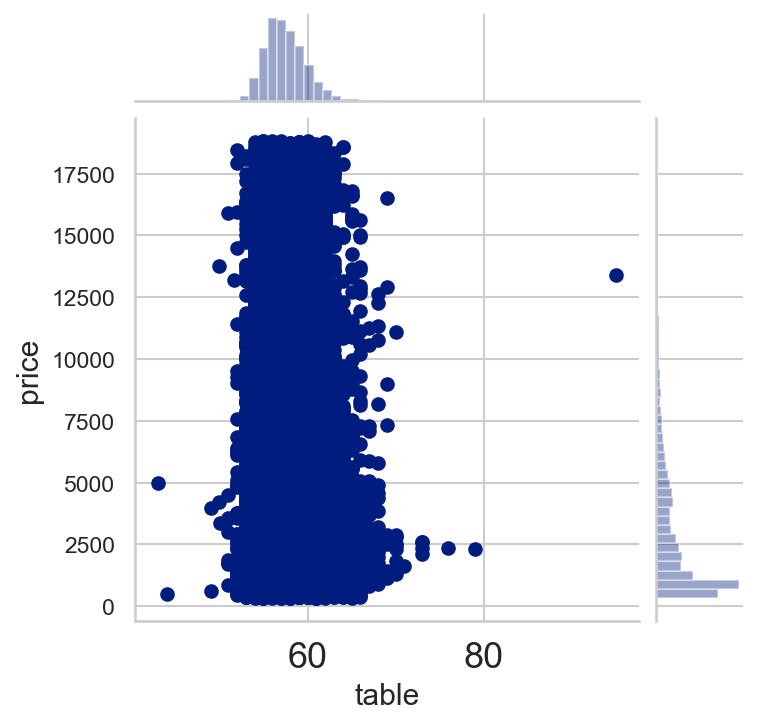

In [40]:
sns.jointplot(x='table', y='price', data=df , height=5)

### Dimensions

(2, 10)

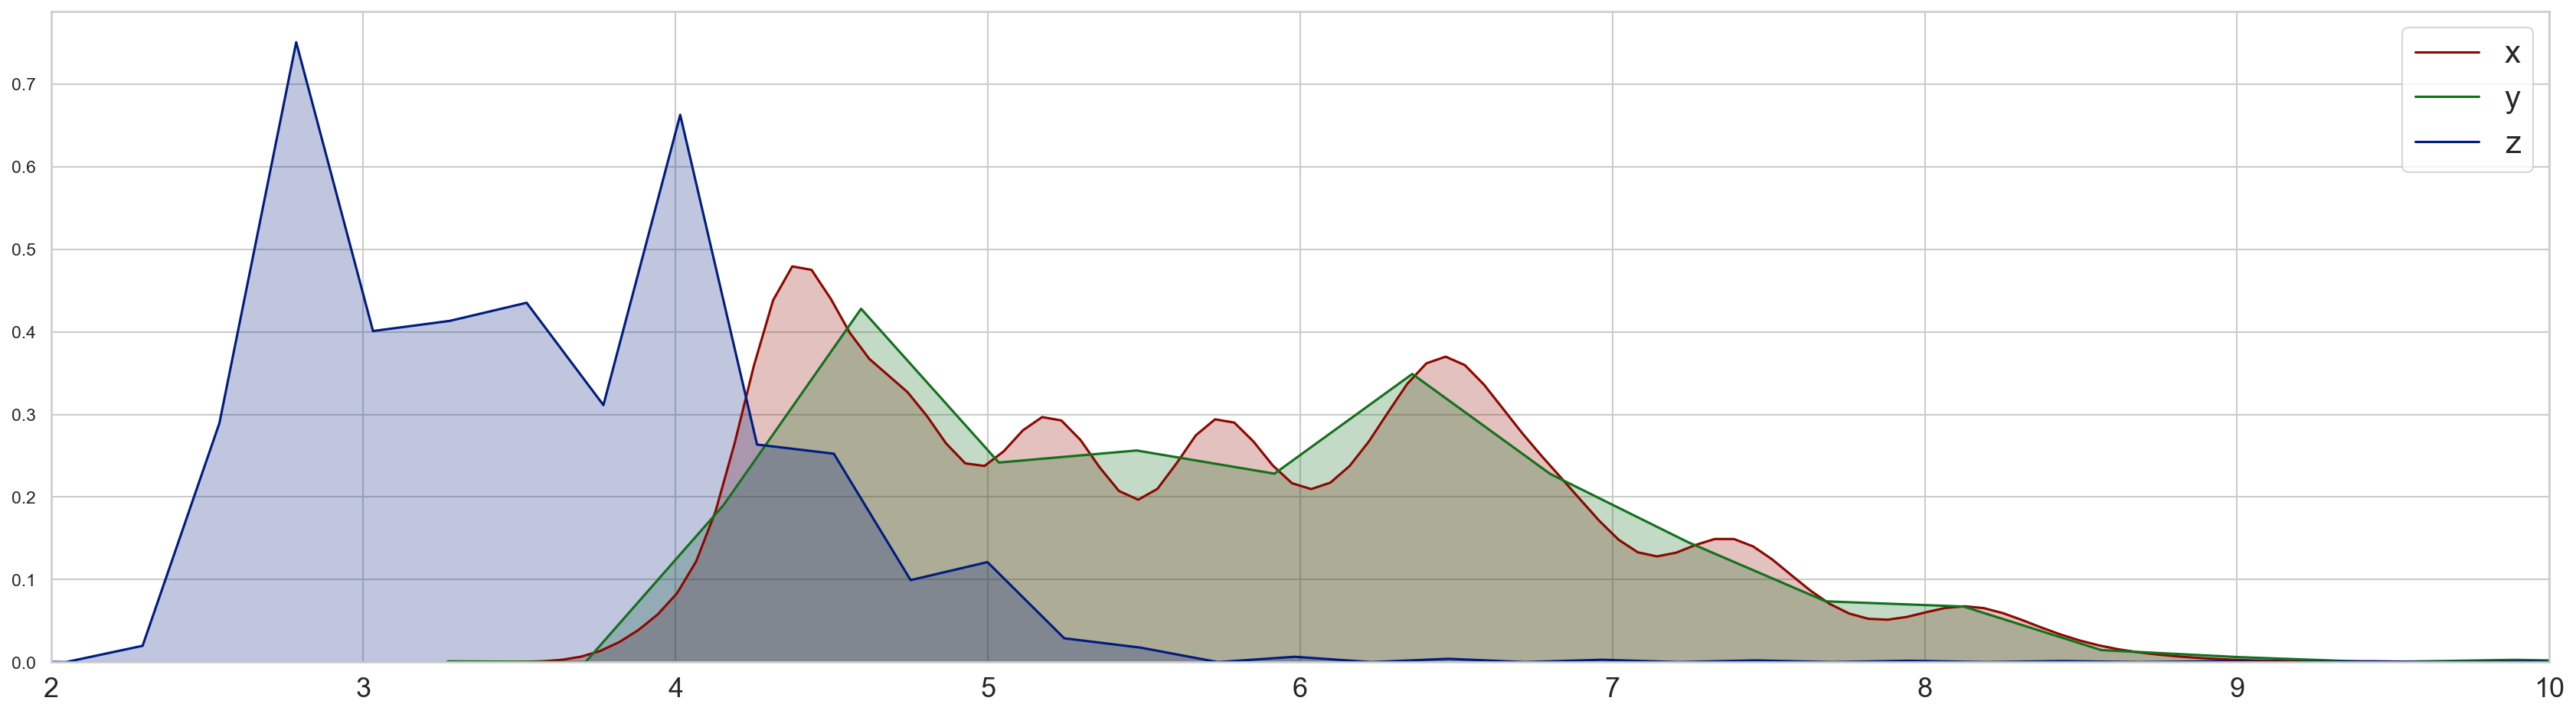

In [41]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)

# Feature Engineering

In [42]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


(0, 50000)

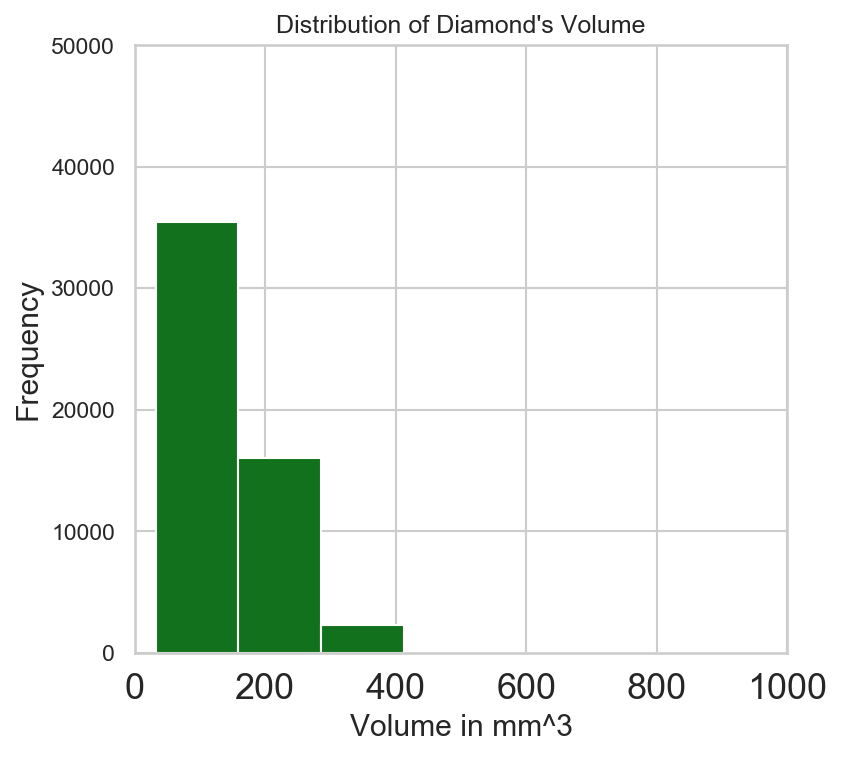

In [43]:
plt.figure(figsize=(5,5))
plt.hist( x=df['volume'] , bins=30 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond\'s Volume')
plt.xlim(0,1000)
plt.ylim(0,50000)

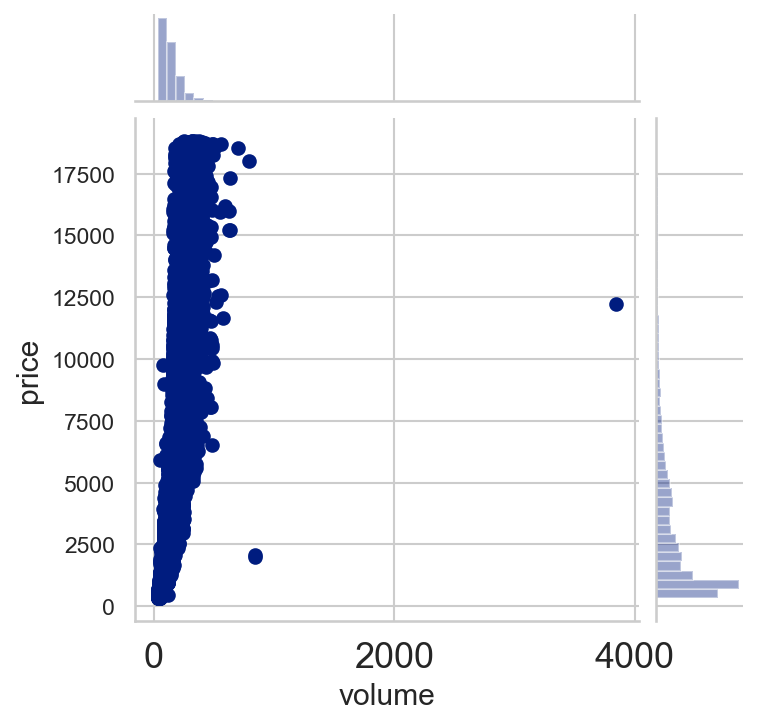

In [44]:
sns.jointplot(x='volume', y='price', data=df, height=5)

In [45]:
df.drop(['x','y','z'], axis=1, inplace=True)

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


# Feature Encoding

In [47]:
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()

In [48]:
df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [49]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


#  Feature Scaling

In [50]:
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [51]:
# Applying Feature Scaling ( StandardScaler )
# You can also Apply MinMaxScaler.

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling Algos

In [53]:
R2_scores = []

models = ['AdaBoost Regression', 'GradientBoosting Regression', 'RandomForest Regression']

## AdaBosst Regression

In [54]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train, y_train)
accuracies = cross_val_score(estimator=clf_ar, X=X_train, y=y_train, cv=5, verbose=1)
y_pred = clf_ar.predict(X_test)
print('\n#### AdaBoost Regression ####')
print('Score: %.4f' %clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_scores.append(r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



#### AdaBoost Regression ####
Score: 0.9096
[0.85794008 0.88261691 0.87843432 0.88779317 0.88746407]

MSE    : 1457363.16 
MAE    : 816.91 
RMSE   : 1207.21 
R2     : 0.91 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.8s finished


## GradientBoosting Regression

In [65]:
clf_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('\n#### Gradient Boosting Regression #####')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_scores.append(r2)

      Iter       Train Loss   Remaining Time 
         1    14009477.5296            3.07s
         2    12437807.7359            2.99s
         3    11113339.5845            2.81s
         4     9945244.2308            2.71s
         5     8973416.9156            2.58s
         6     8109014.7842            2.49s
         7     7387120.0500            2.40s
         8     6753937.9878            2.43s
         9     6197182.6819            2.35s
        10     5724689.0901            2.30s
        20     3200362.4597            1.92s
        30     2393542.3170            1.64s
        40     2102586.3335            1.39s
        50     1923964.9187            1.14s
        60     1790574.6006            0.92s
        70     1688380.2826            0.70s
        80     1609829.0076            0.47s
        90     1548089.0039            0.23s
       100     1499127.4566            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1    13994442.1962            2.47s
         2    12429322.7982            2.16s
         3    11112606.0983            1.58s
         4     9944843.0686            1.99s
         5     8977395.9870            2.05s
         6     8111748.5741            1.81s
         7     7395490.7272            1.95s
         8     6765223.5285            1.87s
         9     6204866.4570            2.04s
        10     5734465.9748            2.11s
        20     3206145.1577            1.75s
        30     2394369.2846            1.41s
        40     2101114.6326            1.22s
        50     1921108.4005            1.00s
        60     1785959.4111            0.79s
        70     1683385.7302            0.58s
        80     1604163.5538            0.38s
        90     1542370.2912            0.19s
       100     1493476.7608            0.00s
      Iter       Train Loss   Remaining Time 
         1    14044115.9884            2.28s
        

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.4s finished


## RandomForest Regression

In [66]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('\n#### Random Forest ####')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished



#### Random Forest ####
Score : 0.9821
[0.97927022 0.9808475  0.98153792 0.97716145 0.98127369]

MSE    : 288460.92 
MAE    : 271.97 
RMSE   : 537.09 
R2     : 0.98 


### Tuning Parameters

In [68]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_scores.append(r2)

Score : 0.9821
R2     : 0.98 


# Visualizing R2-Score of Algorithms

In [70]:
compare = pd.DataFrame({'Algorithms' : models, 'R2-scores' : R2_scores})
compare.sort_values(by = 'R2-scores', ascending = False)

,Algorithms,R2-scores
2,RandomForest Regression,0.982094
0,AdaBoost Regression,0.909597
1,GradientBoosting Regression,0.905833


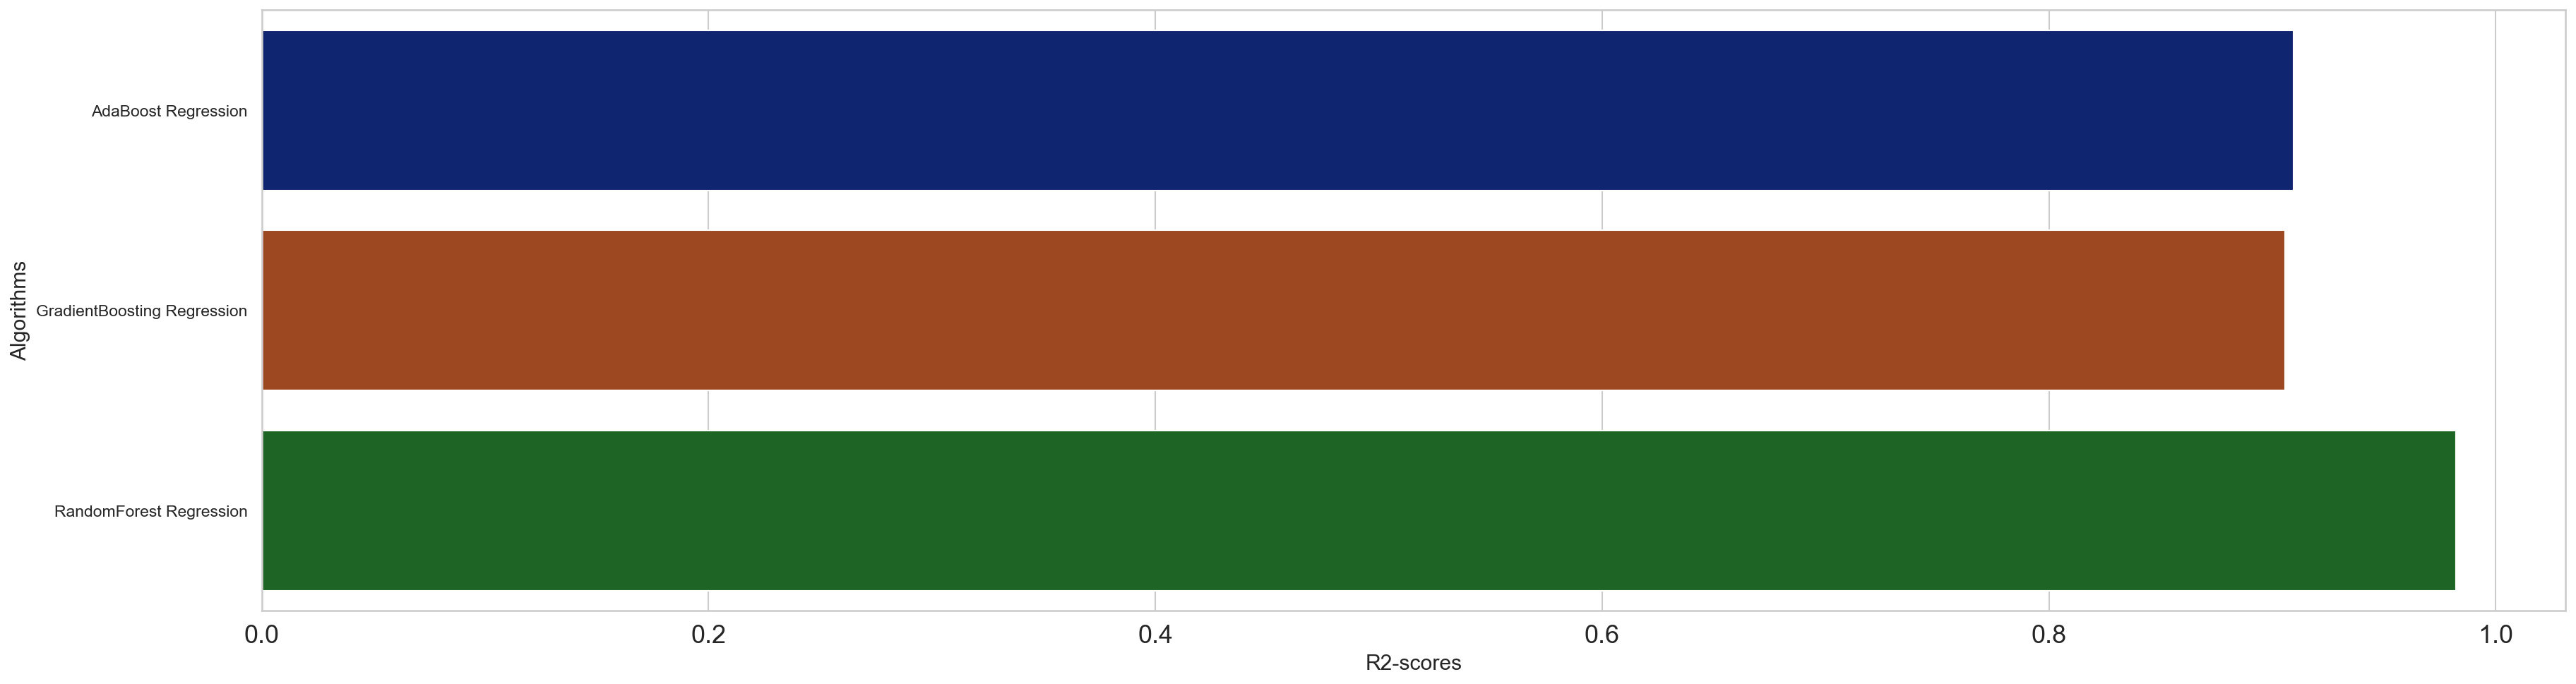

In [82]:
sns.barplot(x='R2-scores', y='Algorithms', data=compare)

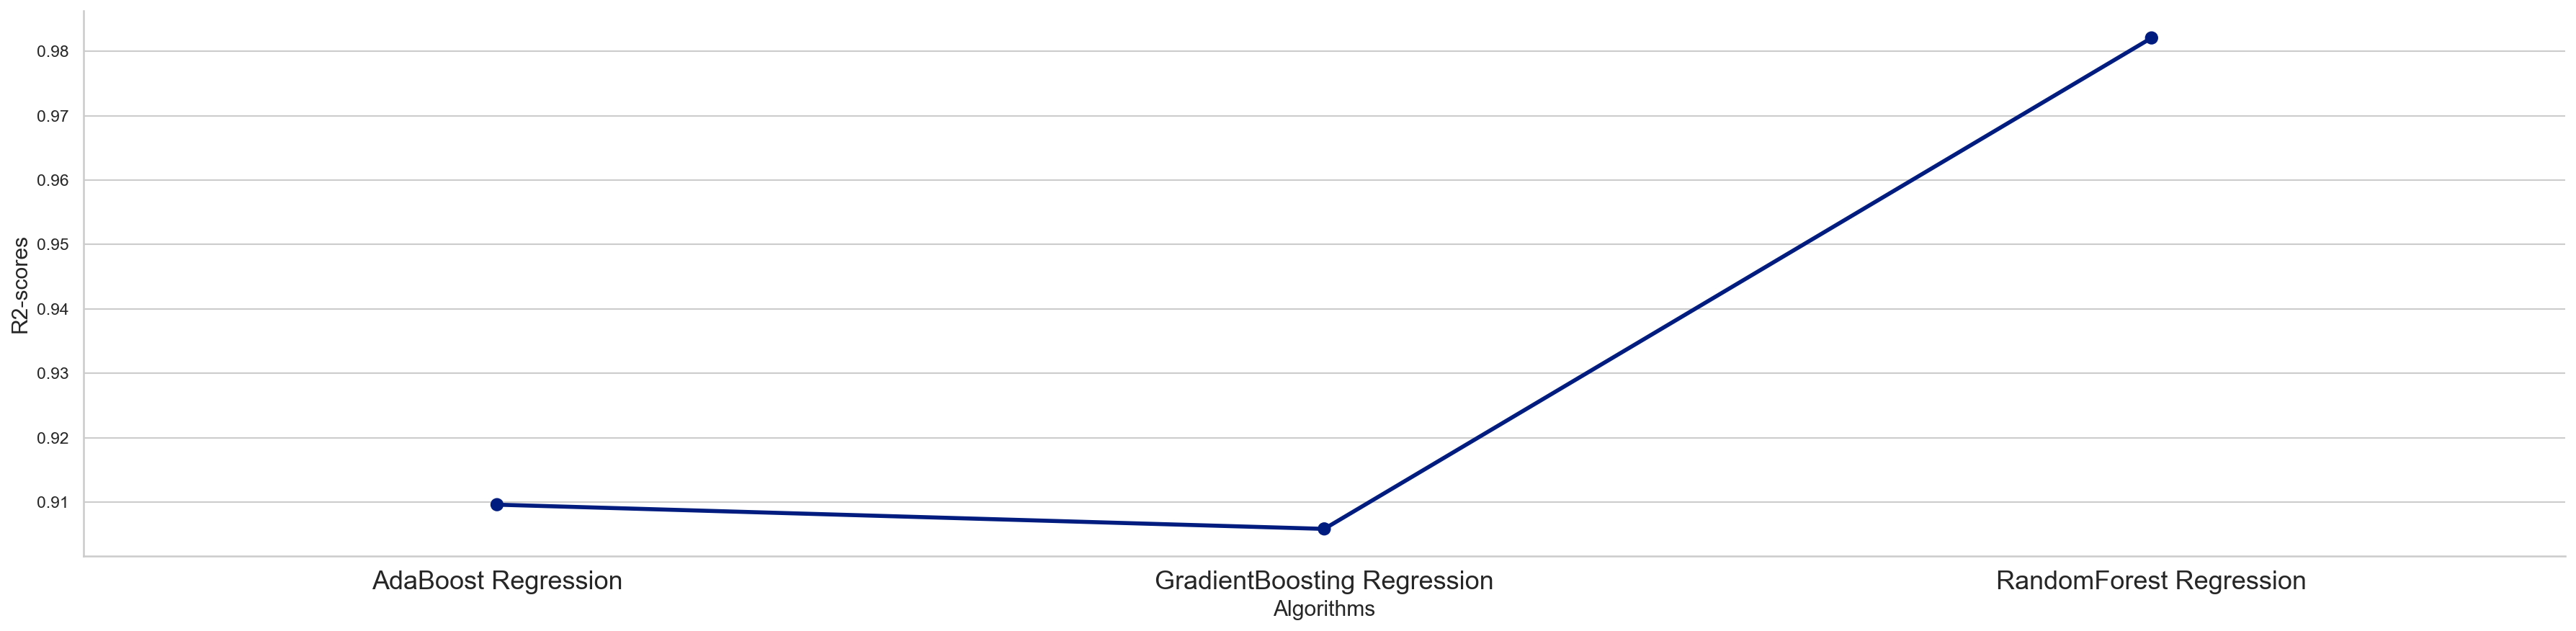

In [85]:
sns.catplot(x='Algorithms', y='R2-scores' , kind='point', data=compare, height=6 , aspect=4)

**Random Forest Regressor gives us the highest R2-Score [ 98% ] .**

# The End!